# Movies / XGBRegressor

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

In [2]:
df = pd.read_parquet("../movies-clean.parquet")
df.head(1)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,TYPE,...,Actor_Özge Borak,Actor_Özge Özpirinçci,Actor_Özgür Emre Yildirim,Actor_Özgür Ozan,Actor_Özkan Ugur,Actor_Özz Nûjen,Actor_Úrsula Corberó,Actor_Úrsula Pruneda,Actor_Ülkü Duru,Actor_Þorsteinn Bachmann
0,Blood Red Sky,2021,"Action,Horror,Thriller",6.1,\nA woman with a mysterious illness is forced ...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,None,Movie,...,0,0,0,0,0,0,0,0,0,0


In [3]:
columns_to_drop=["MOVIES", "YEAR", "GENRE", "ONE-LINE",
                 "STARS", "VOTES", "Gross", "Actors", "Directors"]
df.drop(columns=columns_to_drop, inplace=True)
df.head(1)

,RATING,RunTime,TYPE,Year_From,Year_To,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,...,Actor_Özge Borak,Actor_Özge Özpirinçci,Actor_Özgür Emre Yildirim,Actor_Özgür Ozan,Actor_Özkan Ugur,Actor_Özz Nûjen,Actor_Úrsula Corberó,Actor_Úrsula Pruneda,Actor_Ülkü Duru,Actor_Þorsteinn Bachmann
0,6.1,121.0,Movie,2021,2021,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.astype({"TYPE": "category",
           "Year_From": int,
           "Year_To": int})

df.head()

,RATING,RunTime,TYPE,Year_From,Year_To,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,...,Actor_Özge Borak,Actor_Özge Özpirinçci,Actor_Özgür Emre Yildirim,Actor_Özgür Ozan,Actor_Özkan Ugur,Actor_Özz Nûjen,Actor_Úrsula Corberó,Actor_Úrsula Pruneda,Actor_Ülkü Duru,Actor_Þorsteinn Bachmann
0,6.1,121.0,Movie,2021,2021,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,25.0,Series,2021,2021,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.2,44.0,Series,2010,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,23.0,Series,2013,2013,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,7.6,50.0,Series,2020,2020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df["TYPE"].dtype

CategoricalDtype(categories=['Movie', 'Series'], ordered=False, categories_dtype=object)

## Train/Test Split

In [6]:
X = df.drop(columns=["RATING"])
y = df["RATING"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.10,
                                                    random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")
print(f"Validation Shape: {X_val.shape}")

Train Shape: (5880, 21441)
Test Shape: (1634, 21441)
Validation Shape: (654, 21441)


## Training

In [7]:
%%time
early_stop = xgb.callback.EarlyStopping(
    rounds=10, metric_name='rmse', data_name='validation_0', save_best=True
)

model = XGBRegressor(random_state=42,
                     n_estimators=1000,
                     max_depth=7,
                     enable_categorical=True,
                     eval_metric="rmse",
                     callbacks=[early_stop],
                     n_jobs=-1)
model.fit(X_train, y_train,
         eval_set=[(X_val, y_val)], verbose=True)

[0]	validation_0-rmse:1.08159
[1]	validation_0-rmse:1.03030
[2]	validation_0-rmse:0.99702
[3]	validation_0-rmse:0.97755
[4]	validation_0-rmse:0.96721
[5]	validation_0-rmse:0.96055
[6]	validation_0-rmse:0.94872
[7]	validation_0-rmse:0.94475
[8]	validation_0-rmse:0.94266
[9]	validation_0-rmse:0.93995
[10]	validation_0-rmse:0.93746
[11]	validation_0-rmse:0.93567
[12]	validation_0-rmse:0.93439
[13]	validation_0-rmse:0.93317
[14]	validation_0-rmse:0.93273
[15]	validation_0-rmse:0.93111
[16]	validation_0-rmse:0.93103
[17]	validation_0-rmse:0.93075
[18]	validation_0-rmse:0.92958
[19]	validation_0-rmse:0.92964
[20]	validation_0-rmse:0.92951
[21]	validation_0-rmse:0.92896
[22]	validation_0-rmse:0.92841
[23]	validation_0-rmse:0.92844
[24]	validation_0-rmse:0.92816
[25]	validation_0-rmse:0.92771
[26]	validation_0-rmse:0.92769
[27]	validation_0-rmse:0.92747
[28]	validation_0-rmse:0.92742
[29]	validation_0-rmse:0.92729
[30]	validation_0-rmse:0.92669
[31]	validation_0-rmse:0.92623
[32]	validation_0-

XGBRegressor(base_score=None, booster=None,
             callbacks=[<xgboost.callback.EarlyStopping object at 0x000001F37EB47730>],
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
eval_result = model.evals_result_["validation_0"]['rmse']
eval_result

[1.0815919334020172,
 1.030295934252894,
 0.9970158418678503,
 0.9775515837109577,
 0.967214992220288,
 0.9605508421649439,
 0.9487188779185791,
 0.9447460215548844,
 0.9426646084614605,
 0.9399528122835492,
 0.9374644007713987,
 0.9356712837174052,
 0.9343850797830454,
 0.9331731493906366,
 0.932726240571004,
 0.9311148398028967,
 0.9310325638858125,
 0.9307495557164922,
 0.9295836750094992,
 0.929635934685717,
 0.9295146428209865,
 0.9289632381565025,
 0.9284068722485729,
 0.9284408678094698,
 0.92816033244079,
 0.9277135241288661,
 0.9276939380307995,
 0.9274687741558242,
 0.9274150600523289,
 0.9272910046946454,
 0.9266861572962382,
 0.9262322162863167,
 0.9260519369453745,
 0.9261601952097634,
 0.9253695473960459,
 0.9246374413462162,
 0.9247655853481926,
 0.9237611484408591,
 0.9220793764587546,
 0.9216143410019977,
 0.9216389121982692,
 0.9213979287865681,
 0.921435569151544,
 0.9215328552212945,
 0.9213077961035098,
 0.921336825831912,
 0.9204250657012863,
 0.920466558658753,
 

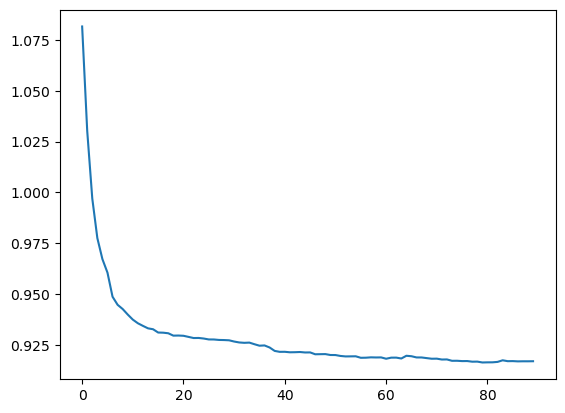

In [13]:
plt.plot(eval_result)
plt.show()

## Evaluation

In [16]:
%%time
predictions = model.predict(X_test)

CPU times: total: 7.97 s
Wall time: 6.92 s


In [15]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
me = (predictions - y_test).mean()

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("ME:", me)

MAE: 0.6713550673850163
MSE: 0.8083008810796146
RMSE: 0.8990555494960334
MAPE: 0.11079138119445459
ME: 0.020278579193638204
